In [1]:
import json
from PIL import Image
import time
import torch
from torchvision import transforms
from efficientnet_pytorch import EfficientNet

In [2]:
# Open image
model_names = ['efficientnet-b0','efficientnet-b1','efficientnet-b2','efficientnet-b3','efficientnet-b4','efficientnet-b5','efficientnet-b6','efficientnet-b7']

model_latencies_dict = {}
for m in model_names:
    model_name = m
    model = EfficientNet.from_pretrained(m)
    image_size = EfficientNet.get_image_size(model_name)
    # Preprocess image
    tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
    img = Image.open('img.jpg')
    img = tfms(img).unsqueeze(0)
    model.eval()
    
    start = time.process_time()
    for i in range(50):
        with torch.no_grad():
            logits = model(img)
    end = time.process_time()
    print(m," Execution time：%f s" % (end - start))
    model_latencies_dict[m] = (end - start)/50

Loaded pretrained weights for efficientnet-b0
efficientnet-b0  Execution time：10.140781 s
Loaded pretrained weights for efficientnet-b1
efficientnet-b1  Execution time：12.711442 s
Loaded pretrained weights for efficientnet-b2
efficientnet-b2  Execution time：14.785803 s
Loaded pretrained weights for efficientnet-b3
efficientnet-b3  Execution time：21.348390 s
Loaded pretrained weights for efficientnet-b4
efficientnet-b4  Execution time：40.395637 s
Loaded pretrained weights for efficientnet-b5
efficientnet-b5  Execution time：77.114529 s
Loaded pretrained weights for efficientnet-b6
efficientnet-b6  Execution time：120.667036 s
Loaded pretrained weights for efficientnet-b7
efficientnet-b7  Execution time：235.182396 s


In [3]:
print(model_latencies_dict)

{'efficientnet-b0': 0.20281562246, 'efficientnet-b1': 0.25422883077999997, 'efficientnet-b2': 0.29571605602, 'efficientnet-b3': 0.4269678034, 'efficientnet-b4': 0.80791274738, 'efficientnet-b5': 1.5422905722000002, 'efficientnet-b6': 2.4133407110200005, 'efficientnet-b7': 4.703647912840001}


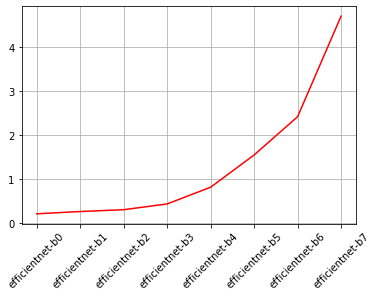

In [4]:
import matplotlib.pyplot as plt 
names = ["input layer"]
plt.plot(model_latencies_dict.keys(), model_latencies_dict.values(), color='red')
plt.xticks(rotation=45)
plt.grid()
# plt.show()
plt.savefig('model_latencies.png')

In [5]:
import json

# as requested in comment

with open('vokdka_latenies.txt', 'w') as file:
     file.write(json.dumps(model_latencies_dict))